# Problem Statement: Concrete Strength Prediction

Name: Ghaidaa Al Kuhaili

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-Ghaidaa-AlKuhaili

# Steps and Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
conc_data = pd.read_csv('concrete.csv')
conc_data.head()
#conc_data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# 1. Exploratory data quality report

# 1.1 Univariate Analysis:

# a. Data Types:

In [3]:
conc_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

# b.Description of independent attributes (Name, Range, Central values, Standard deviation, Quartiles, Analysis of distributions, Tails, Missing values, Outliers, Duplicates)

# b.1 Name, Range, Central values, Standard deviation, Quartiles

In [4]:
conc_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# b.2 Analysis of distributions

In [5]:
# The count shows that there is no missing values 
# The 50% is the same as the median.


# b.3 Tails and Outliers

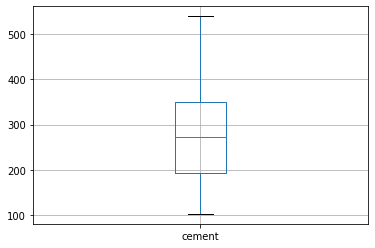

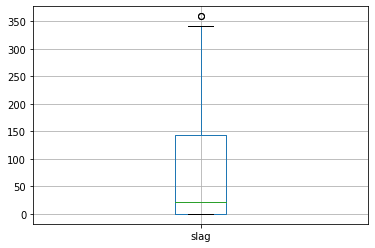

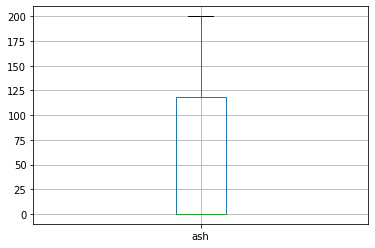

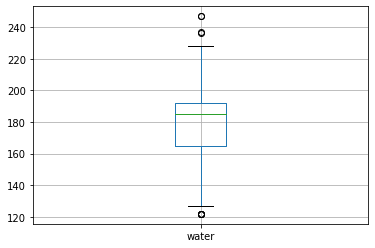

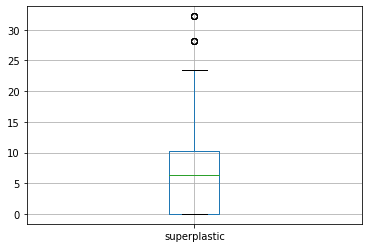

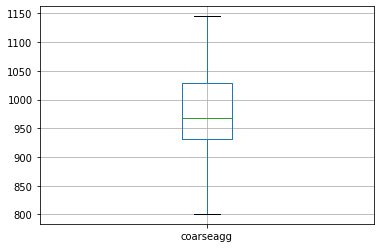

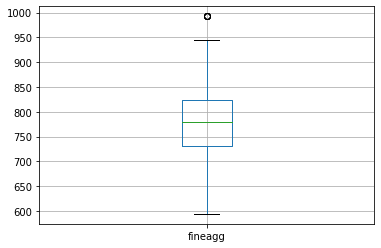

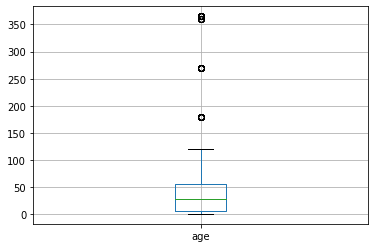

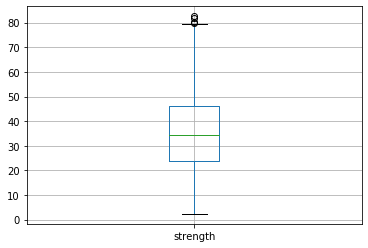

In [6]:
cols = conc_data.columns.tolist()
for col in cols:
    boxplot = conc_data.boxplot(column = col)
    plt.show()

In [7]:
#--------Outliers Analysis --------------#

#Slag has 1 outlier (359).
#Water has 3 outliers (121.8, 246.9,247).
#Superplastic has 2 outliers (28.2,32.2).
#Fineagg has 1 outlier (992.6).
#Age has 5 outliers (120,180,270,360,365) >> greater than 4 months are considered outliers.
#Strength has 3 outliers (80.2, 81.75,82.6)

#--------Tails Analysis -----------------#
#We can see that some of the attributes are having tails and are skewed. 
#To view the distribution of each feature check below cell.


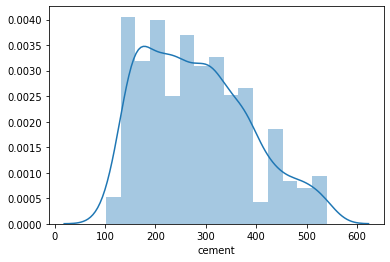

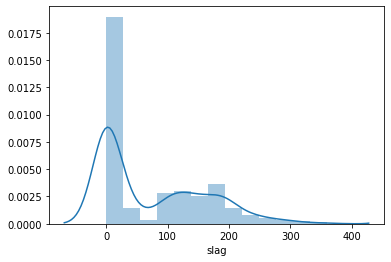

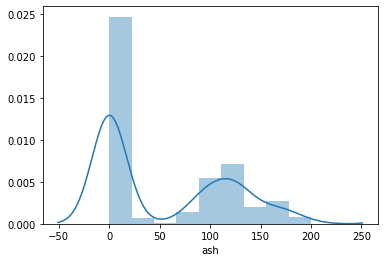

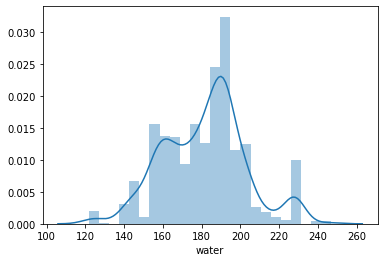

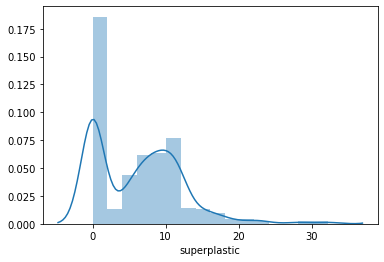

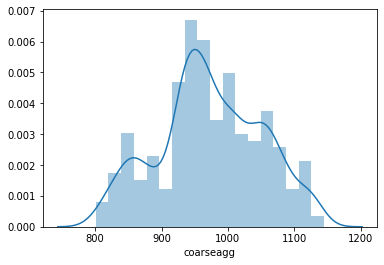

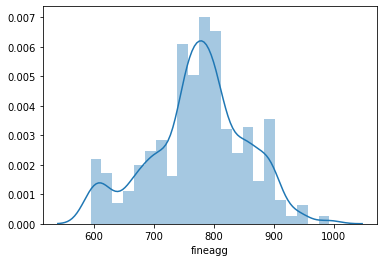

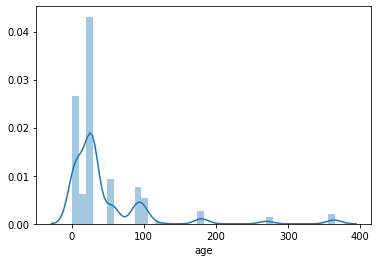

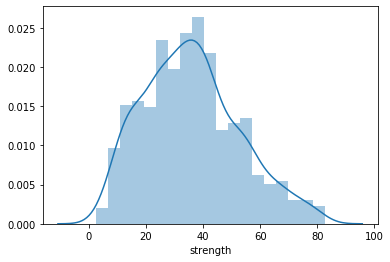

In [8]:
cols = conc_data.columns.tolist()
for col in cols:
    sns.distplot(conc_data[col]);
    plt.show()
    



In [9]:
#We can observe that Slag, ash, superplastic,and age are having long tails. This make sense as they contained 
#greater number of outliers. For the slag we have only one outlier, but still we can observe a tail. 
#that is because most of the slags values fals in the area between [0,140] and very rare values are beyond this range
#which caused the tail.

#same analysis aplies to the rest of attributes.

# b.4 Missing values

In [10]:
# no missing values as indicated by the count statistical summary
print (conc_data.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


# 1.2 Bi- Variate Analysis:

# a. Between the predictor variables:

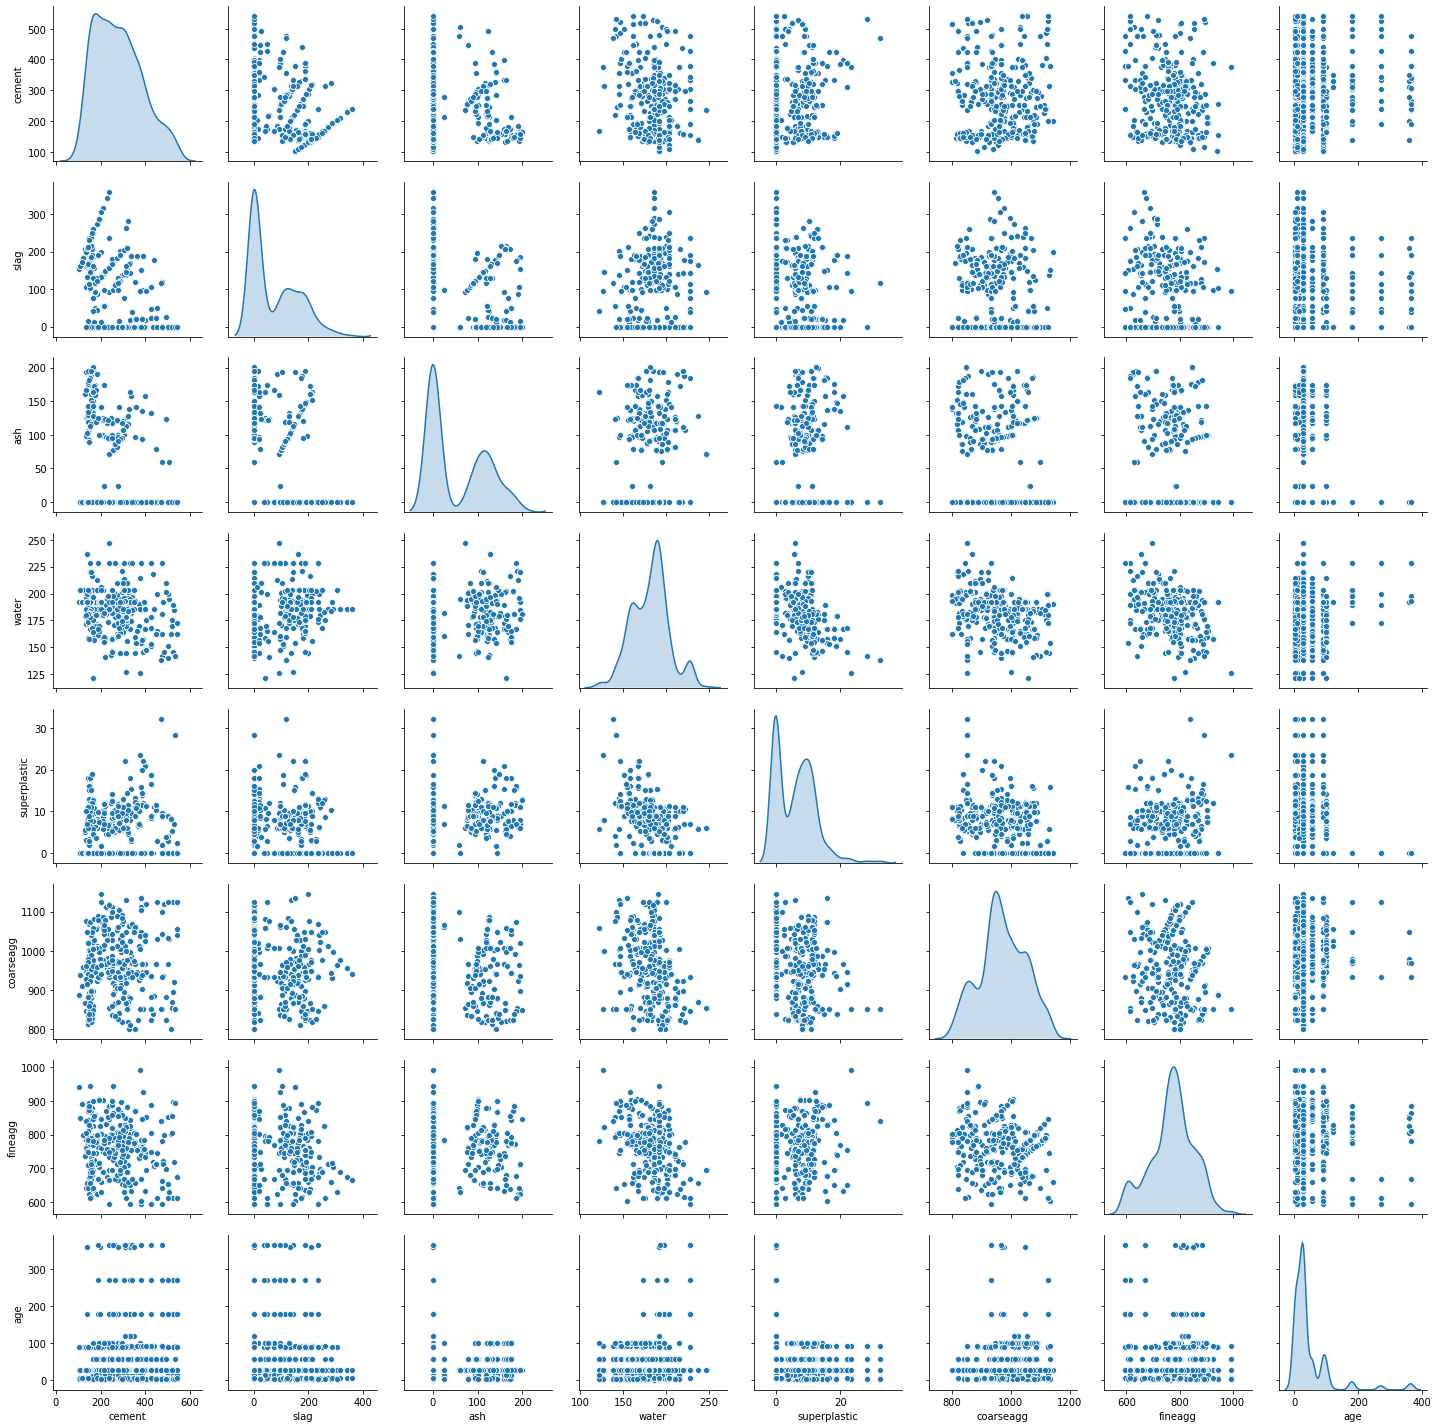

In [11]:
conc_data_attr = conc_data.iloc[:, 0:8]
sns.pairplot(conc_data_attr, diag_kind='kde')

# b. Between the predictor variables and target column 

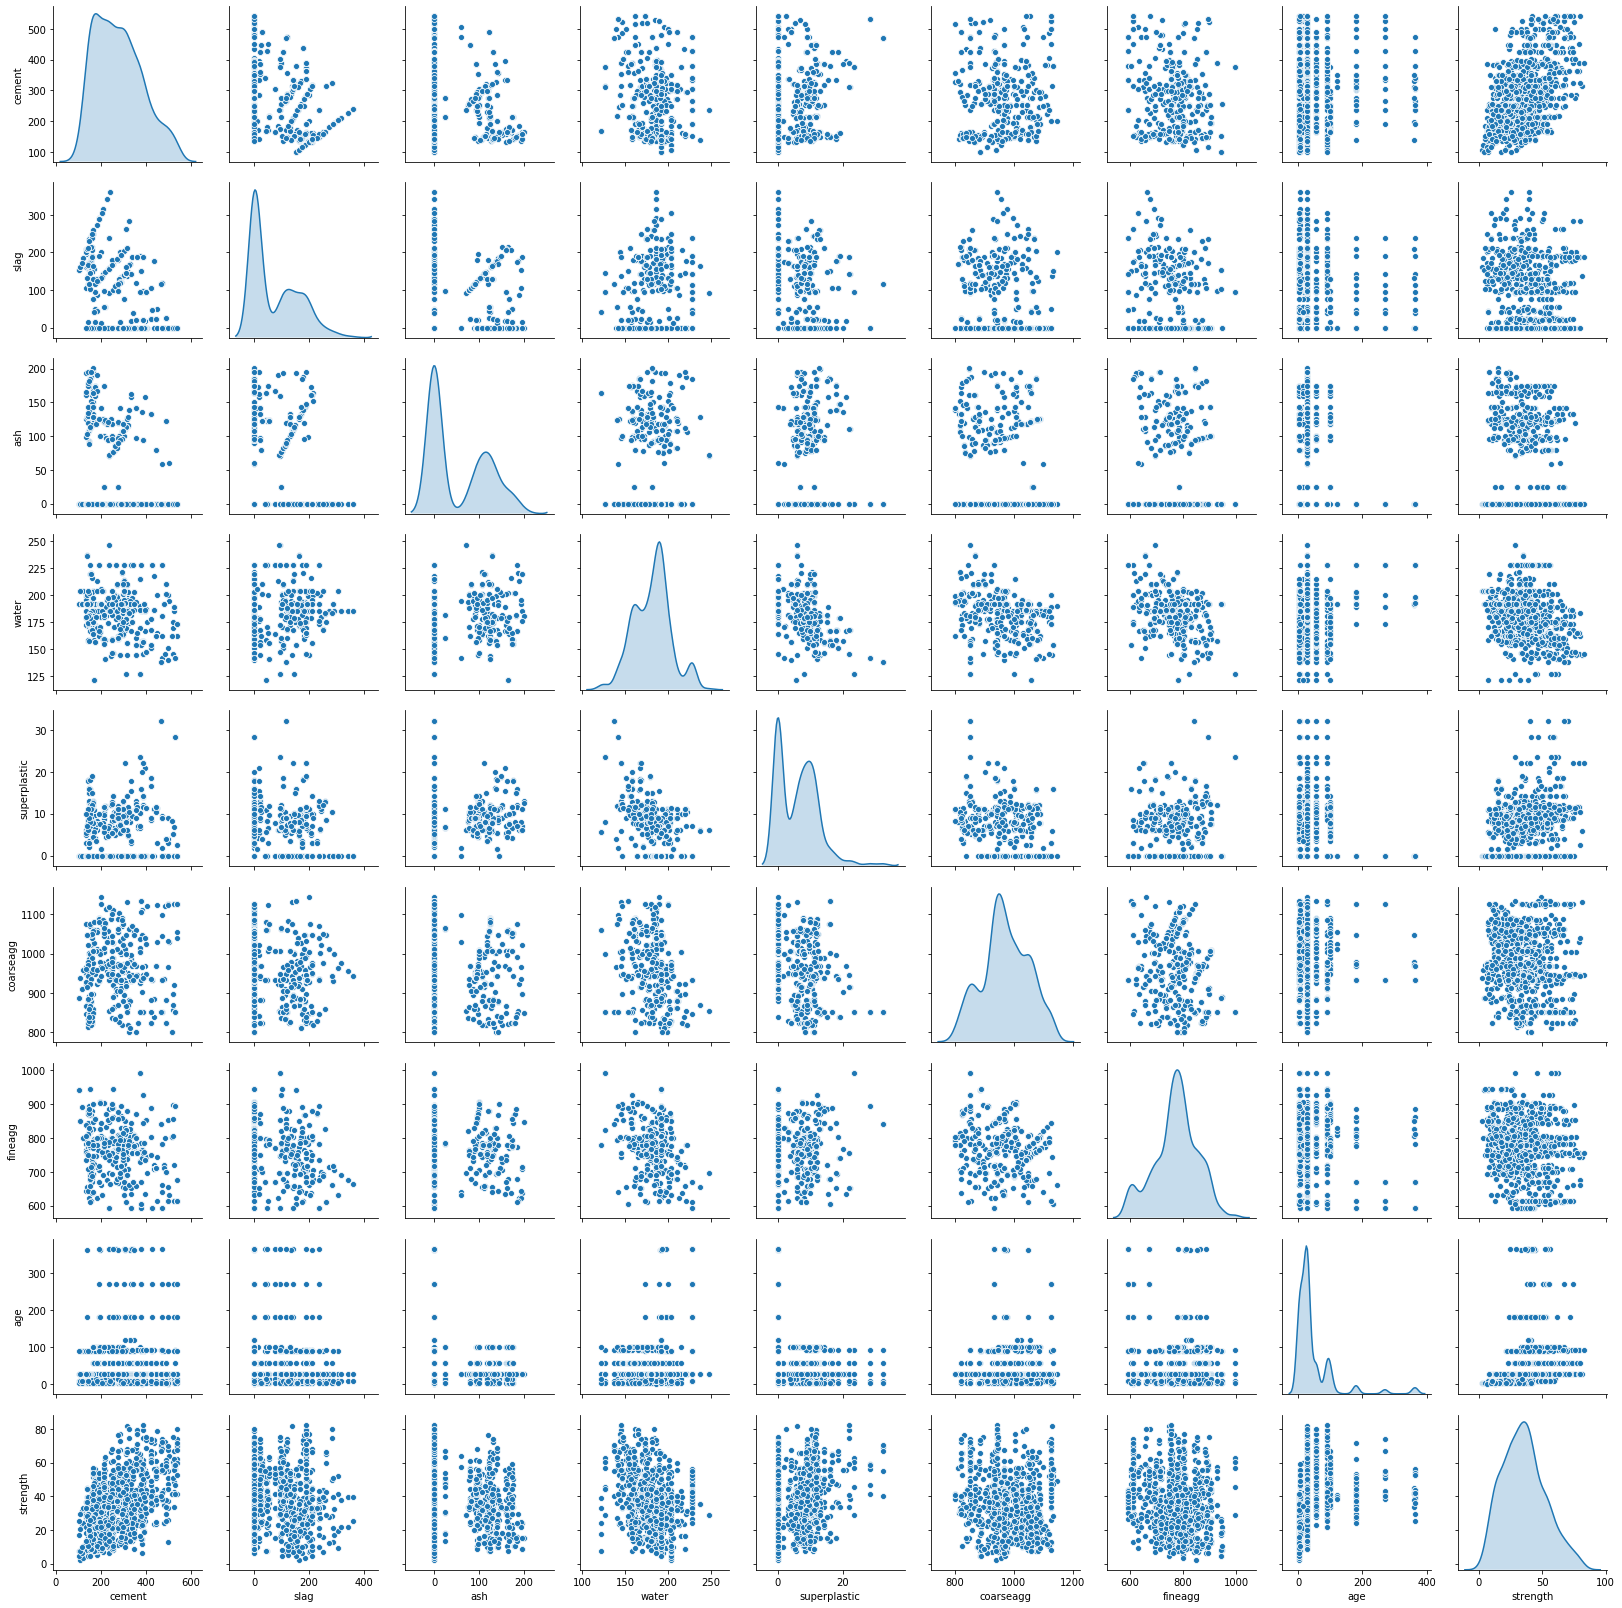

In [12]:
conc_data_attr = conc_data.iloc[:, 0:9]
sns.pairplot(conc_data_attr, diag_kind='kde')

# c. Comment on your findings in terms of their relationship and degree of relation if any

In [13]:
#There is a clear positive correlation between strength and cement. [Degree: Strong]

#There is a clear negative correlation between water and superplastic. [Degree: Strong]

#There is a clear negative correlation between water and strength. [Degree: Strong]

#There is a positive correlation between superplastic and ash. [Degree: Medium]

#There is a positive correlation between superplastic and fineagg. [Degree: Medium]

#There is a positive correlation between ash and fineagg. [Degree: Medium]

#We can observe that as age increase the strength increases as well. 

#Also, as the age increase the water level needed increase as well. 


# Heatmap to visualize the correlation among features more clearly

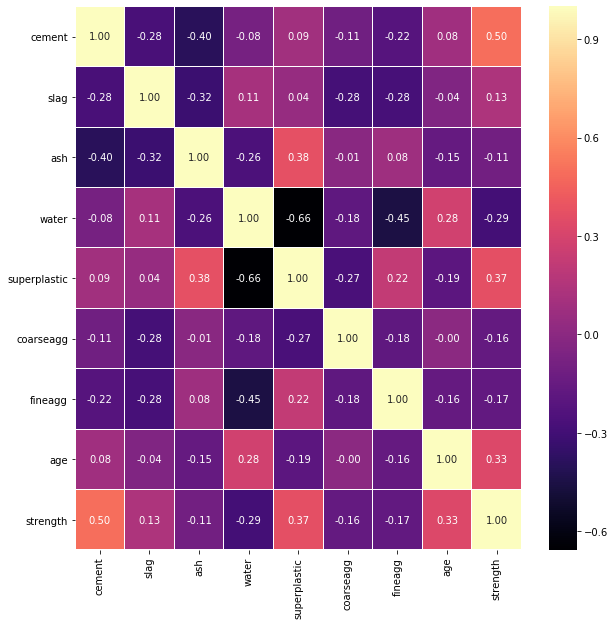

In [14]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(conc_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()


# d. Visualize the analysis:

# d.1 using boxplots

In [15]:
#box plot has been illustrated above.

# d.2 pair plots

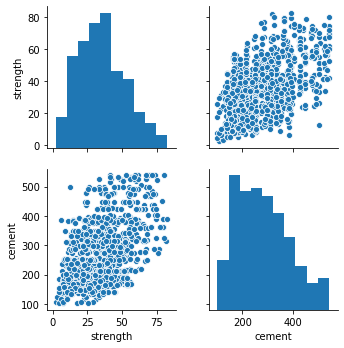

In [16]:
sns.pairplot(conc_data[['strength','cement']]); # it is clear that strength will increases as the cement increases

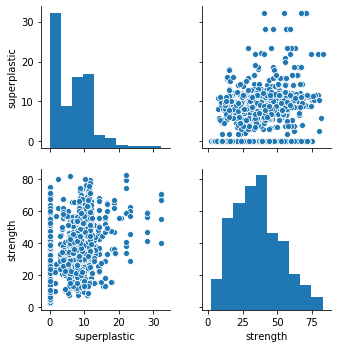

In [17]:
sns.pairplot(conc_data[['superplastic','strength']]); # strength increase as the superplastic increases

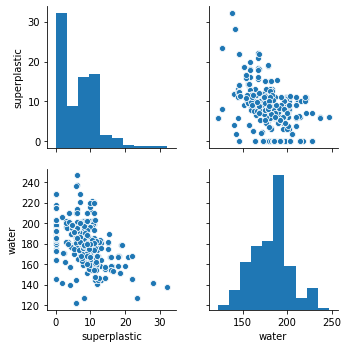

In [18]:
sns.pairplot(conc_data[['superplastic','water']]); #superplastic increase as water decreases

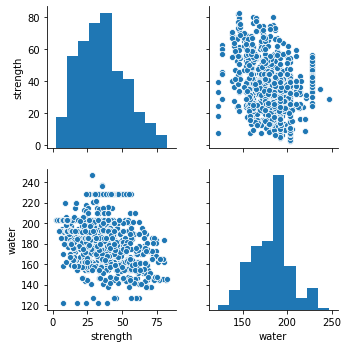

In [19]:
sns.pairplot(conc_data[['strength','water']]); #strength increases as water decreases

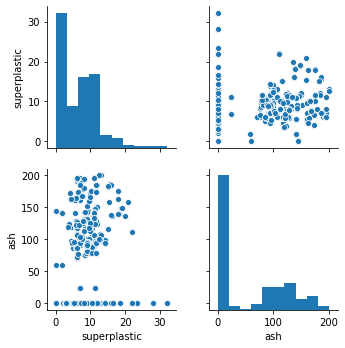

In [20]:
sns.pairplot(conc_data[['superplastic','ash']]); #superplastic increase as ash increases

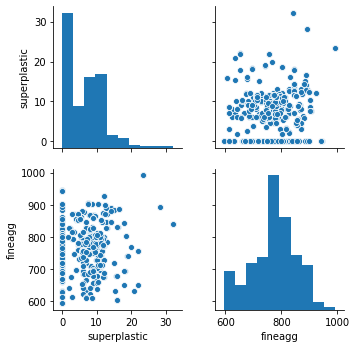

In [21]:
sns.pairplot(conc_data[['superplastic','fineagg']]); #superplastic increase as fineagg increases

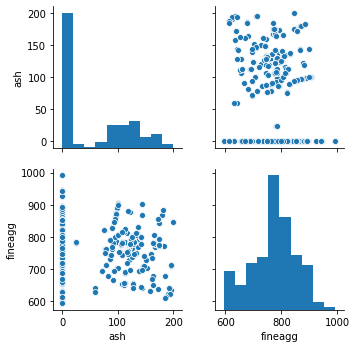

In [22]:
sns.pairplot(conc_data[['ash','fineagg']]); #ash increases as fineagg increases

# d.3 histograms or density curves

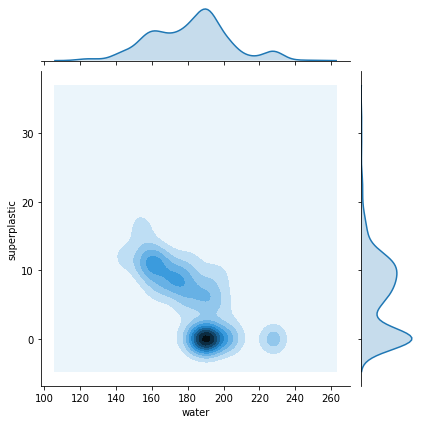

In [23]:
sns.jointplot(conc_data['water'], conc_data['superplastic'], kind="kde");

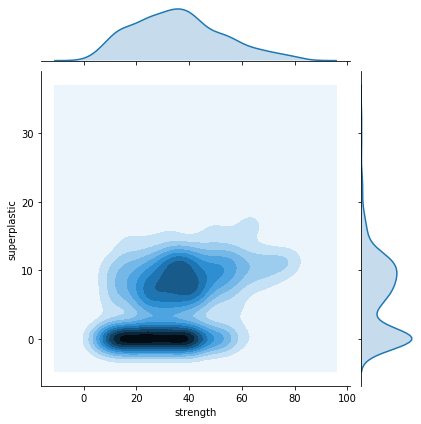

In [24]:
sns.jointplot(conc_data['strength'], conc_data['superplastic'], kind="kde");

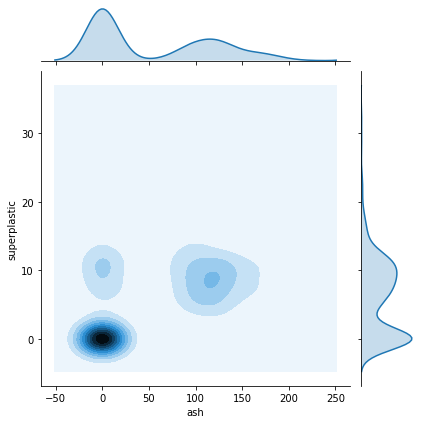

In [25]:
sns.jointplot(conc_data['ash'], conc_data['superplastic'], kind="kde");

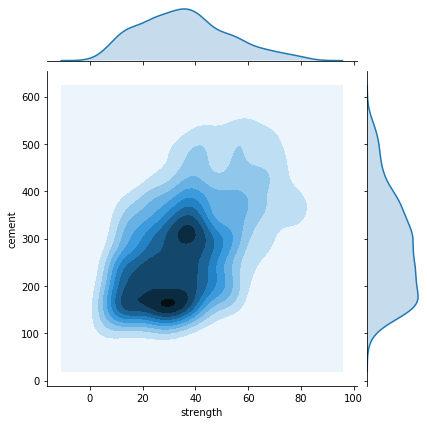

In [26]:
sns.jointplot(conc_data['strength'], conc_data['cement'], kind="kde");

# 1.3 Feature Engineering techniques

# a. Identify opportunities to extract a new feature from existing features, or drop a feature

In [27]:
# We have two features which are not adding that much value to the data sample; which are: slag, and coarseagg.
# deleting them will not cause any deficiencied in the prediction.
# however, the total number of features we have is not very large so keeping them will work fine with us.

# We will study the features importance for each model once we start building the models.

# b. Get data model ready and do a train test split.

In [11]:
X = conc_data.drop('strength',axis=1)
y = conc_data['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28


In [12]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(conc_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(conc_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

In [ ]:
#simple linear model might not work with high performance as we will see when we apply Linear Regression model 
#in the subsequent cells.

#However, Quadratic model will work good in our problem as we will see in Random forests regressors, decision trees regressors
#, Bagging, and Gradient Boost




# Creating the model and tuning it

# Algorithms that you think will be suitable for this project

In [13]:
# Algorithims as we see them suitable for our prediction objective:

    #(1)Linear Regression
    #(2)Decision Tree Regressor
    #(3)Random Forest Regressor
    #(4)Bagging Regressor
    #(5)Gradient Boost Regressor

# Creating the models and use appropriate metrics and store them in a datafram for comparision

In [14]:
# Since it is a regression problem, we are going to calculate the RSME and accuracy score as evaluation metrics

# ------Linear Regression ------

Model			 RMSE 		 R2
LinearRegression 	 10.32 		0.63
[0.47614371 0.67567905 0.69840899 0.57072063 0.54738709 0.68539964
 0.59863602 0.61651603 0.50396964 0.54624389]


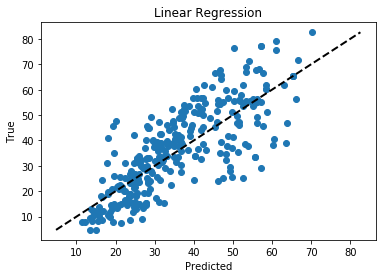

,Method,Accuracy
0,LinearRegression,59.191047


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Linear Regression model
lr_model = LinearRegression()
# Fitting model on Training data 
lr_model.fit(X_train, y_train)
# Making predictions on Test data 
y_pred_lr = lr_model.predict(X_test)
#calculating RSME
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""LinearRegression \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr)))


#evaluating using 10 fold cross validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model_score_lr_cv = cross_val_score(lr_model, X, y, cv=kfold)
print(model_score_lr_cv)
lr_accuracy = model_score_lr_cv.mean()*100.0
#print("Accuracy: %.3f%% (%.3f%%)" % (model_score_lr_cv.mean()*100.0, model_score_lr_cv.std()*100.0))

#Accuracy
#model_score_lr = lr_model.score(X_test, y_test)
#print("Accuracy: ", model_score_lr*100, "%")


#plotting the model scatter plot
plt.scatter(y_pred_lr,y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Linear Regression") 
plt.show()

#Result Dataframe
resultsDf = pd.DataFrame({'Method':['LinearRegression'], 'Accuracy': lr_accuracy})
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf



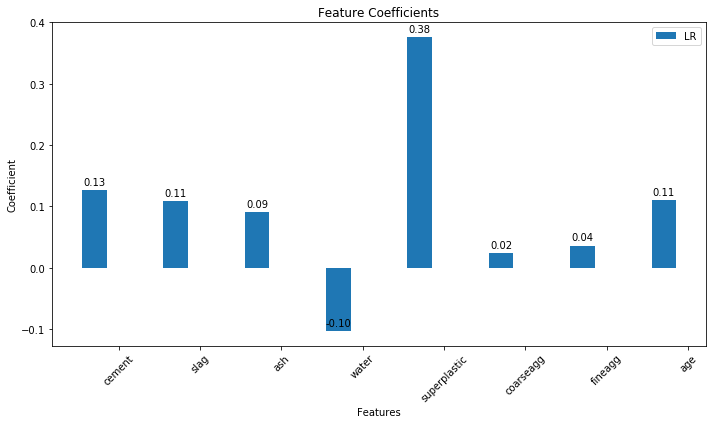

In [49]:
coeff_lr = lr_model.coef_ 
labels = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR') 
ax.set_ylabel('Coefficient') 
ax.set_xlabel('Features') 
ax.set_title('Feature Coefficients') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend()
def autolabel(rects): 
   """Attach a text label above each bar in *rects*, displaying its height.""" 
   for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1)
fig.tight_layout() 
plt.show()

# ------Decision Tree Regressor

Model			 RMSE 		 R2
Decision Tree 	 6.27 		0.86
[0.80844157 0.84651624 0.92530578 0.88192739 0.78692685 0.90424096
 0.90178401 0.88986681 0.86352297 0.89134669]


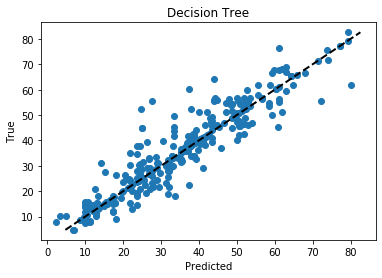

,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.998793


In [50]:
from sklearn.tree import DecisionTreeRegressor 
# Decision Tree model
dt_model = DecisionTreeRegressor()
# Fitting model on Training data 
dt_model.fit(X_train, y_train)
# Making predictions on Test data 
y_pred_dt = dt_model.predict(X_test)
#calculating RSME
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""Decision Tree \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_dt)), r2_score(y_test, y_pred_dt)))

#cross validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model_score_dt_cv = cross_val_score(dt_model, X, y, cv=kfold)
print(model_score_dt_cv)
dt_accuracy = model_score_dt_cv.mean()*100.0
#print("CV Accuracy: %.3f%% (%.3f%%)" % (model_score_dt_cv.mean()*100.0, model_score_dt_cv.std()*100.0))

#Accuracy
#model_score_dt = dt_model.score(X_test, y_test)
#print("Accuracy: ", model_score_dt*100, "%")


#plotting the model scatter plot
plt.scatter(y_pred_dt,y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree") 
plt.show()

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [dt_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf


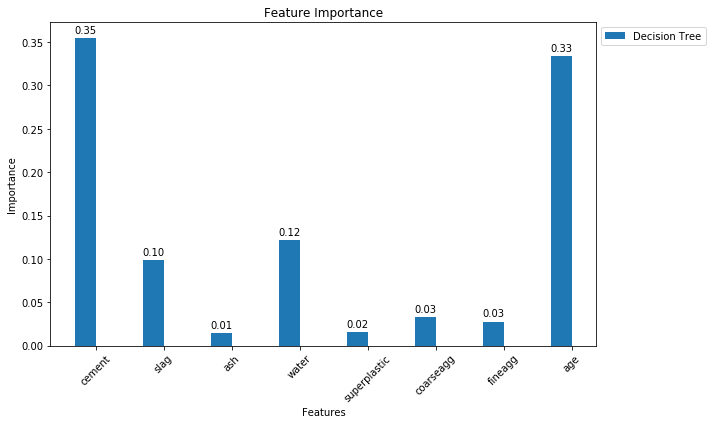

In [51]:
feature_dt = dt_model.feature_importances_  
labels = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dt, width, label='Decision Tree') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1)  
fig.tight_layout() 
plt.show()

# ------ Bagging Regressor model ------

Model			 RMSE 		 R2
Bagging Regressor 	 5.56 		0.89
[0.86119181 0.90001912 0.9392272  0.91410863 0.89197196 0.93277363
 0.9389661  0.90575747 0.88848569 0.92318382]


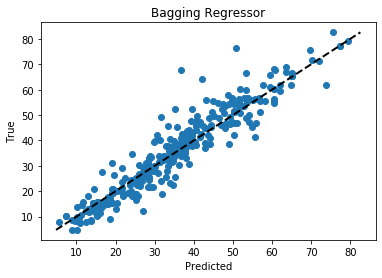

,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.998793
0,Bagging Regressor,90.956854


In [52]:
from sklearn.ensemble import BaggingRegressor
# Bagging Regressor model
bag_model = BaggingRegressor()

# Fitting model on Training data 
bag_model.fit(X_train, y_train)
# Making predictions on Test data 
y_pred_bag = bag_model.predict(X_test)
#calculating RSME
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""Bagging Regressor \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_bag)), r2_score(y_test, y_pred_bag)))

#cross validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model_score_bag_cv = cross_val_score(bag_model, X, y, cv=kfold)
print(model_score_bag_cv)
bag_accuracy = model_score_bag_cv.mean()*100.0
#print("CV Accuracy: %.3f%% (%.3f%%)" % (model_score_bag_cv.mean()*100.0, model_score_bag_cv.std()*100.0))

#Accuracy
#model_score_bag = bag_model.score(X_test, y_test)
#print("Accuracy: ", model_score_bag*100, "%")

#plotting the model scatter plot
plt.scatter(y_pred_bag,y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Bagging Regressor") 
plt.show()

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'Accuracy': [bag_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf



# ------ Gradient Boost Regressor model ------

Model			 RMSE 		 R2
Gradient Boost Regressor 	 5.31 		0.90
[0.89174502 0.88724812 0.93724321 0.8880615  0.87124784 0.92390978
 0.92648049 0.92149637 0.90236373 0.90880979]


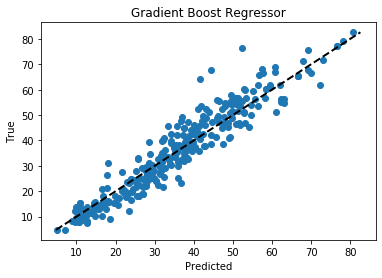

,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.998793
0,Bagging Regressor,90.956854
0,Gradient Boost Regressor,90.586059


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boost Regressor model
gb_model = GradientBoostingRegressor()


# Fitting model on Training data 
gb_model.fit(X_train, y_train)
# Making predictions on Test data 
y_pred_gb = gb_model.predict(X_test)
#calculating RSME
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""Gradient Boost Regressor \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_gb)), r2_score(y_test, y_pred_gb)))

#cross validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model_score_gb_cv = cross_val_score(gb_model, X, y, cv=kfold)
print(model_score_gb_cv)
gb_accuracy = model_score_gb_cv.mean()*100.0
#print("CV Accuracy: %.3f%% (%.3f%%)" % (model_score_gb_cv.mean()*100.0, model_score_gb_cv.std()*100.0))

#Accuracy
#model_score_gb = gb_model.score(X_test, y_test)
#print("Accuracy: ", model_score_gb*100, "%")

#plotting the model scatter plot
plt.scatter(y_pred_gb,y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Gradient Boost Regressor") 
plt.show()

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'Accuracy': [gb_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

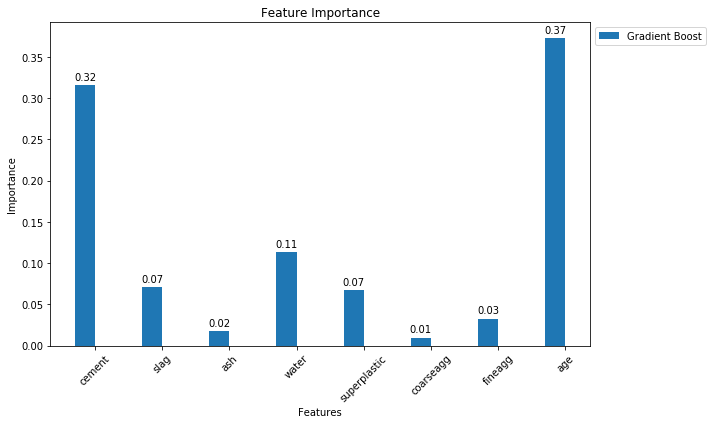

In [54]:
feature_gb = gb_model.feature_importances_  
labels = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_gb, width, label='Gradient Boost') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1)  
fig.tight_layout() 
plt.show()

# ------Random Forest Regressor------

Model			 RMSE 		 R2
Random Forest 	 5.23 		0.91
[0.87723863 0.89154748 0.95872901 0.92179428 0.88415308 0.93566389
 0.93692636 0.9189473  0.92375316 0.93063607]


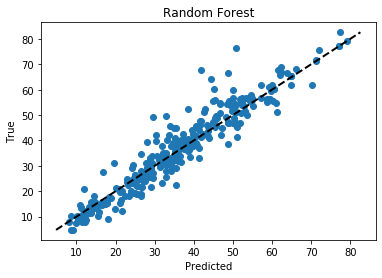

,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.998793
0,Bagging Regressor,90.956854
0,Gradient Boost Regressor,90.586059
0,Random Forest,91.793893


In [55]:
from sklearn.ensemble import RandomForestRegressor 
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
# Fitting model on Training data 
rf_model.fit(X_train, y_train)
# Making predictions on Test data 
y_pred_rf = rf_model.predict(X_test)
#calculating RSME
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t RMSE \t\t R2") 
print("""Random Forest \t {:.2f} \t\t{:.2f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred_rf)), r2_score(y_test, y_pred_rf)))

#cross validation
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model_score_rf_cv = cross_val_score(rf_model, X, y, cv=kfold)
print(model_score_rf_cv)
rf_accuracy = model_score_rf_cv.mean()*100.0
#print("CV Accuracy: %.3f%% (%.3f%%)" % (model_score_rf_cv.mean()*100.0, model_score_rf_cv.std()*100.0))

#Accuracy
#model_score_rf = rf_model.score(X_test, y_test)
#print("Accuracy: ", model_score_rf*100, "%")

#plotting the model scatter plot
plt.scatter(y_pred_rf,y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest") 
plt.show()

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [rf_accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

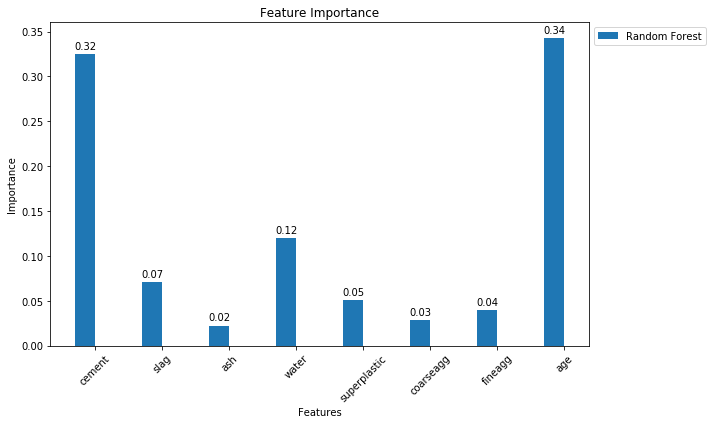

In [56]:
feature_rf = rf_model.feature_importances_  
labels = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_rf, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1)  
fig.tight_layout() 
plt.show()

# Use Grid Search or Random Search on any of the two models used above.

# Make a DataFrame to compare models after hyperparameter tuning

# 1. Implement Grid Search on Bagging Regressor

In [57]:
param_grid_bag= {'n_estimators': list(range(1,50)),'bootstrap':('True','False'),'oob_score':('True','False')}
from sklearn.model_selection import GridSearchCV
gs_bag = GridSearchCV(bag_model,param_grid_bag,cv=10)

In [58]:
gs_bag.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some input

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': ('True', 'False'),
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'oob_score': ('True', 'False')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
gs_bag.best_params_
gs_bag.cv_results_['mean_test_score']
model_score_gs_gap = gs_bag.cv_results_['mean_test_score']
Accuracy_gs_gap = model_score_gs_gap.mean()*100.0

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Grid Search on Bagging Regressor'], 'Accuracy': [Accuracy_gs_gap]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf



,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.998793
0,Bagging Regressor,90.956854
0,Gradient Boost Regressor,90.586059
0,Random Forest,91.793893
0,Grid Search on Bagging Regressor,88.362180


# 2. Implement Random Search on Bagging Regressor

In [34]:
from sklearn.model_selection import RandomizedSearchCV
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(bag_model, param_distributions=param_grid_bag, n_iter=samples) #default cv = 3

In [35]:
randomCV.fit(X, y)
print(randomCV.best_params_)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:1011: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do no

{'oob_score': 'True', 'n_estimators': 39, 'bootstrap': 'True'}


In [36]:
model_score_gs_gap_rand = randomCV.cv_results_['mean_test_score']
Accuracy_gs_gap_rand = model_score_gs_gap_rand.mean()*100.0

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Random Search on Bagging Regressor'], 'Accuracy': [Accuracy_gs_gap_rand]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

,Method,Accuracy
0,LinearRegression,59.191047
0,Decision Tree,86.512101
0,Bagging Regressor,90.464668
0,Gradient Boost Regressor,87.417784
0,Random Forest,91.647414
0,Grid Search on Bagging Regressor,88.375008
0,Random Search on Bagging Regressor,88.485685


# 1. Implement Grid Search on Gradient Boost Regressor

In [60]:
param_grid_gb= {'n_estimators': list(range(1,50)),'learning_rate':list(range(1,5)),'loss':('ls','lad','huber','quantile')}
from sklearn.model_selection import GridSearchCV
gs_gb = GridSearchCV(gb_model,param_grid_gb,cv=10)


In [61]:
gs_gb.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [62]:
gs_gb.best_params_
gs_gb.cv_results_['mean_test_score']
model_score_gs_gb = gs_gb.cv_results_['mean_test_score']
Accuracy_gs_gb = model_score_gs_gb.mean()*100.0

#Result Dataframe
tempResultsDf = pd.DataFrame({'Method':['Grid Search on Gradient Boost Regressor'], 'Accuracy': [Accuracy_gs_gb]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

,Method,Accuracy
0,LinearRegression,5.919105e+01
0,Decision Tree,8.699879e+01
0,Bagging Regressor,9.095685e+01
0,Gradient Boost Regressor,9.058606e+01
0,Random Forest,9.179389e+01
0,Grid Search on Bagging Regressor,8.836218e+01
0,Grid Search on Gradient Boost Regressor,-1.496244e+46


In [63]:
# --End of Project